# Importing the libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Exercise 1: Load a dataset and prepare the data for linear regression.

Importing the dataset

In [4]:
dataset = pd.read_csv('HousingData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values  # MEDV

Taking care of missing data

In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])

Splitting the dataset into the Training set and Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Exercise 2: Training the Simple Linear Regression model on the Training set

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Exercise 3: Predict the target variable for the test set.

In [8]:
y_pred = regressor.predict(X_test)

# Exercise 4: Calculate the Mean Squared Error (MSE).

In [9]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 34.9873895442388


# Exercise 5: Calculate the R-squared value.

In [10]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2}")

R-squared value: 0.5703296053895555


# Exercise 6: Plot the regression line along with the actual data points

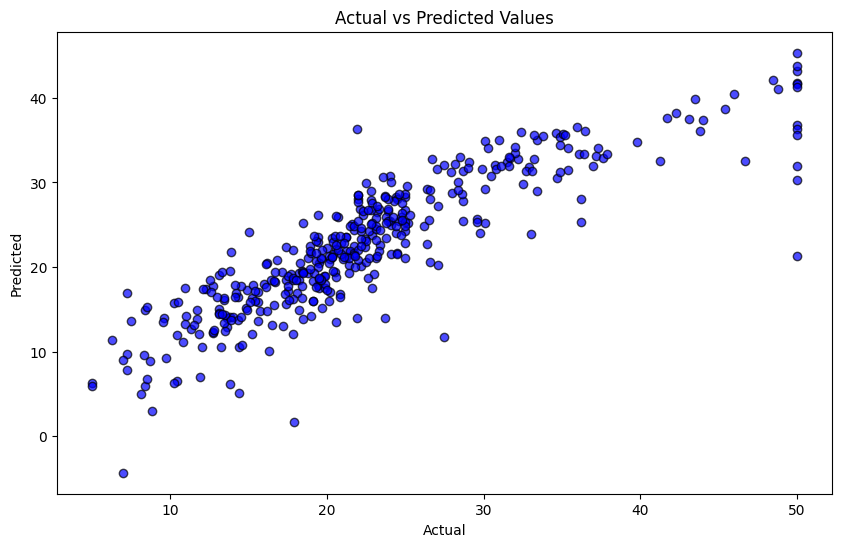

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, regressor.predict(X_train), color='blue', edgecolor='k', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Exercise 7: Evaluate the model's performance by comparing the predicted values with the actual values. Create a scatter plot of the predicted vs. actual values.

we use r2_score to evaluate our model and find its accuracy.

In [12]:
print(f"Accuracy of the model is {r2 * 100:.2f}%.")

Accuracy of the model is 57.03%.


Scatter plot of the predicted vs. actual values.

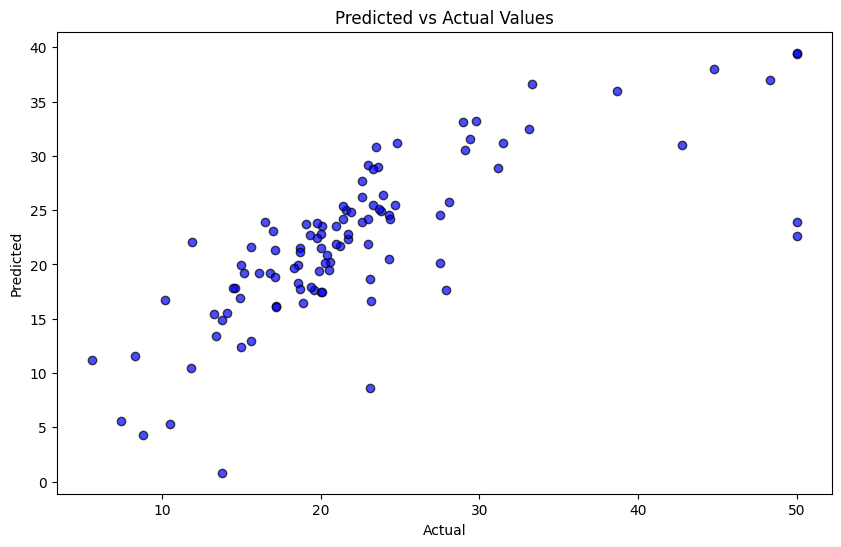

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.show()


# Exercise 8: Interpret the coefficients of the linear regression model. Explain the impact of each feature on the target variable.

In [14]:
# coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_.flatten()})
coefficients = pd.DataFrame({'Feature': dataset.columns[:-1], 'Coefficient': regressor.coef_})

In [15]:
coefficients

,Feature,Coefficient
0,CRIM,-0.126194
1,ZN,0.037636
2,INDUS,-0.062630
3,CHAS,2.703829
4,NOX,-14.501582
5,RM,4.080070
6,AGE,-0.021151
7,DIS,-1.417987
8,RAD,0.196343
9,TAX,-0.008707


Interpretation of coefficients

In [16]:
for index, row in coefficients.iterrows():
    print(f"Feature '{row['Feature']}' has a coefficient of {row['Coefficient']:.2f}")
    if row['Coefficient'] > 0:
        print(f"  -> An increase in '{row['Feature']}' leads to an increase in the target variable (MEDV).")
    else:
        print(f"  -> An increase in '{row['Feature']}' leads to a decrease in the target variable (MEDV).")

Feature 'CRIM' has a coefficient of -0.13
  -> An increase in 'CRIM' leads to a decrease in the target variable (MEDV).
Feature 'ZN' has a coefficient of 0.04
  -> An increase in 'ZN' leads to an increase in the target variable (MEDV).
Feature 'INDUS' has a coefficient of -0.06
  -> An increase in 'INDUS' leads to a decrease in the target variable (MEDV).
Feature 'CHAS' has a coefficient of 2.70
  -> An increase in 'CHAS' leads to an increase in the target variable (MEDV).
Feature 'NOX' has a coefficient of -14.50
  -> An increase in 'NOX' leads to a decrease in the target variable (MEDV).
Feature 'RM' has a coefficient of 4.08
  -> An increase in 'RM' leads to an increase in the target variable (MEDV).
Feature 'AGE' has a coefficient of -0.02
  -> An increase in 'AGE' leads to a decrease in the target variable (MEDV).
Feature 'DIS' has a coefficient of -1.42
  -> An increase in 'DIS' leads to a decrease in the target variable (MEDV).
Feature 'RAD' has a coefficient of 0.20
  -> An inc